# Epidemic Sim

## ODE Sim Method (Euler)
Ordinary Differential Equation, computing averages
> Euler explicit algorithm (or forward Euler) 

In [34]:
# epidemic parameters
beta = 0.001
gamma = 0.1

In [35]:
# Euler simulation of a SIR epidemic model

import numpy as np
import pandas as pd
from IPython.display import display

# create df with columns for S, I, R
df = pd.DataFrame(columns=['S', 'I', 'R'])

# initial conditions
# add a row to df with initial conditions
df.loc[len(df.index)] = [500, 1, 0]
display(df.head(5))

# df = pd.concat({'S': 999, 'I': 1, 'R': 0}, ignore_index=True)

nb_steps = 100

,S,I,R
0,500,1,0


In [40]:
# empty df except first row
df = df.iloc[0:1]

# run simulation
for i in range(nb_steps):
    # get last row of df
    last_step_row = df.iloc[i]
    # get values of last row
    S = last_step_row['S']
    I = last_step_row['I']
    R = last_step_row['R']
    # compute new values
    new_S = S - beta*I*S
    new_I = I + beta*I*S - gamma*I
    new_R = R + gamma*I
    # add new row to end of df
    df.loc[len(df.index)] = [new_S, new_I, new_R]

display(df.head(5))
print(df.shape)

,S,I,R
0,500.00000,1.000000,0.000000
1,499.50000,1.400000,0.100000
2,498.80070,1.959300,0.240000
3,497.82340,2.740670,0.435930
4,496.45903,3.830973,0.709997


(101, 3)


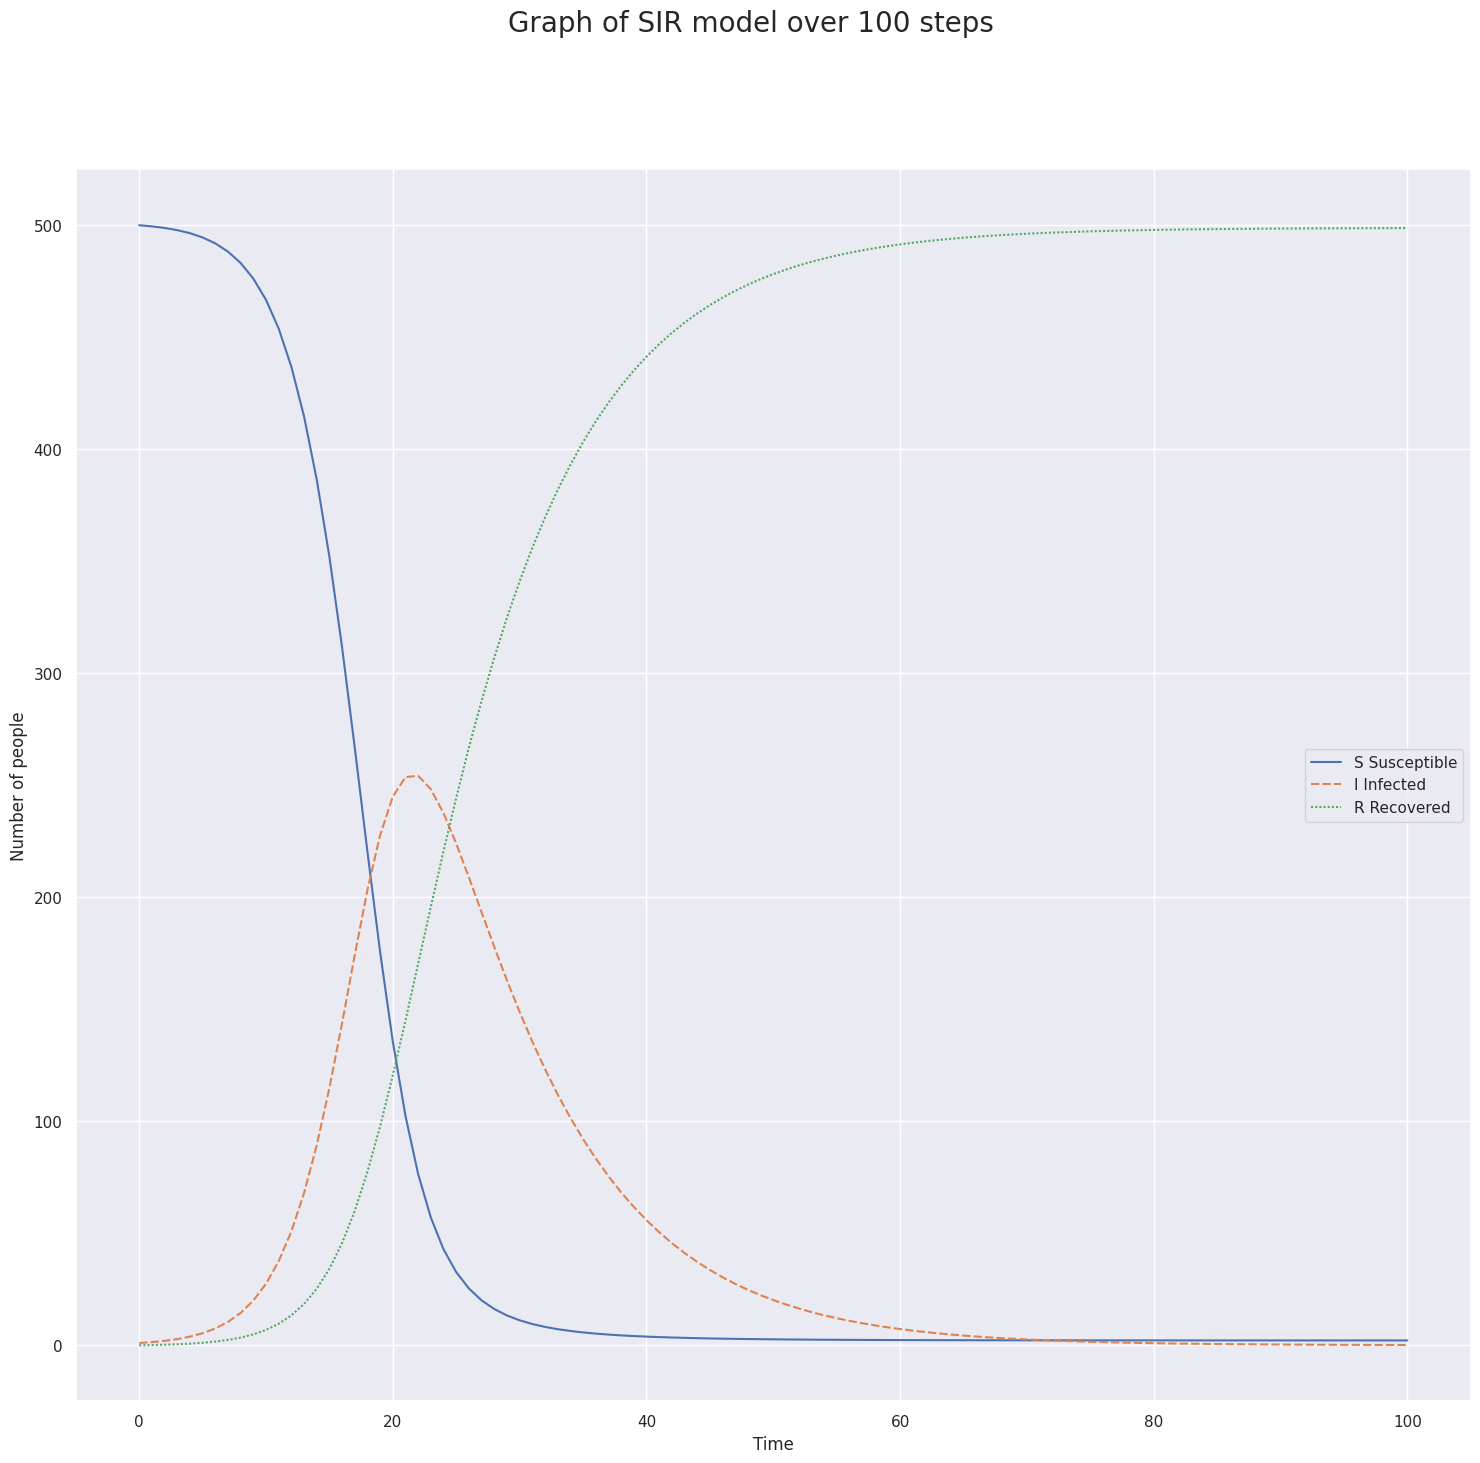

In [41]:
# plot results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(1, 1, figsize=(18,16))
fig.suptitle(f"Graph of SIR model over {nb_steps} steps", fontsize=20)

g = sns.lineplot(data=df, ax=ax)
g.set(xlabel="Time", ylabel="Number of people")

# legend settings
g.legend().set_title("curves")
# replace labels
new_labels = ['S Susceptible', 'I Infected', 'R Recovered']
for t, l in zip(g.legend().texts, new_labels):
    t.set_text(l)

## SSA (Gillespie)
Stochastic Simulation Algorithms
> Next reaction algorithm (Gillespie)